In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

# **Image Preprocessing**

In [ ]:
image_path = '/content/drive/MyDrive/image_captioning_data/images/'


In [ ]:
images = glob(image_path+'*.jpg')


In [ ]:
len(images)

8120

In [ ]:
images[:5]

['/content/drive/MyDrive/image_captioning_data/images/3726629271_7639634703.jpg',
 '/content/drive/MyDrive/image_captioning_data/images/3744832122_2f4febdff6.jpg',
 '/content/drive/MyDrive/image_captioning_data/images/393958545_48c17c66d1.jpg',
 '/content/drive/MyDrive/image_captioning_data/images/3726076549_0efb38854b.jpg',
 '/content/drive/MyDrive/image_captioning_data/images/380537190_11d6c0a412.jpg']

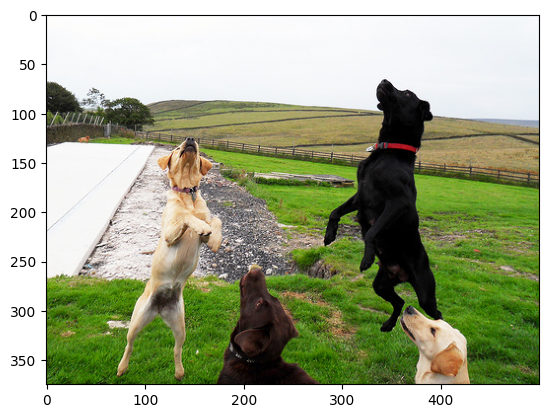

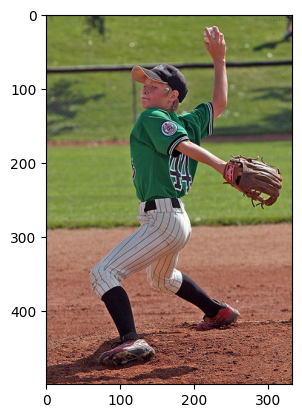

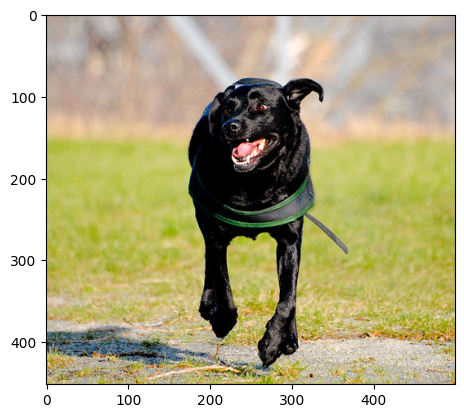

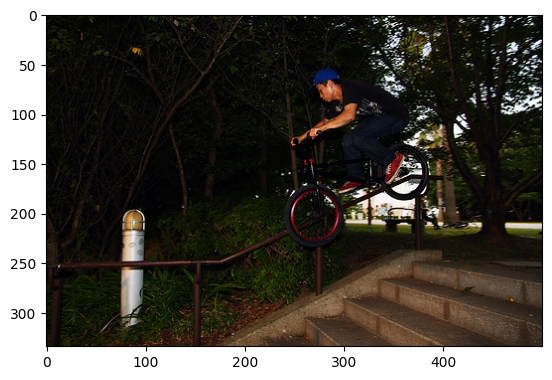

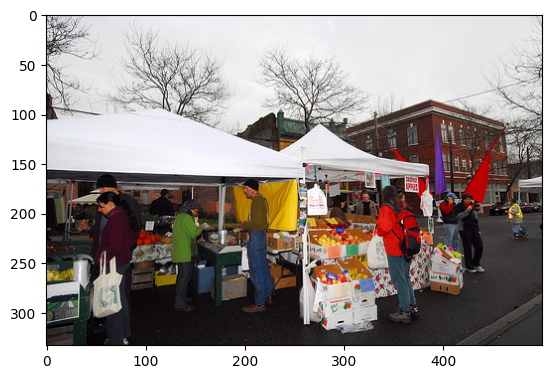

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
incept_model.summary()   #we want avg pooling layer as a output layer so we need to remove last layer

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output  # -2 means second last layer and output neuron will be the last layer
modele = Model(inputs = incept_model.input,outputs = last) # create a new model in which input will be the incept_model.input and output will be the last layer
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
images[0].split('/')[-1]

'3726629271_7639634703.jpg'

In [ ]:
images_features = {}  # we are going to create a dictionary and key of the dict is name of the image and value will be output from that resnet model
count = 0
for i in images:
    img = cv2.imread(i) #cv2 reads in BGR format so we need to convert it in RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224)) #resizing the image to 224 x 224

    img = img.reshape(1,224,224,3) # 3 stands for RGB color channels as it has 3 color channels
    pred = modele.predict(img).reshape(2048,)

    img_name = i.split('/')[-1]

    images_features[img_name] = pred

    count += 1

    if count > 500:
        break

    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 358ms/step
50
1/1 [==============================] - 0s 313ms/step
100
1/1 [==============================] - 0s 312ms/step
150
1/1 [==============================] - 0s 339ms/step
200
1/1 [==============================] - 0s 206ms/step
250
1/1 [==============================] - 0s 196ms/step
300
1/1 [==============================] - 0s 208ms/step
350
1/1 [==============================] - 0s 193ms/step
400
1/1 [==============================] - 0s 194ms/step
450
1/1 [==============================] - 0s 186ms/step
500
1/1 [==============================] - 0s 200ms/step


In [ ]:
len(images_features)

501

## **Text Preprocessing **

In [ ]:
caption_path = '/content/drive/MyDrive/image_captioning_data/captions.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
captions

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a 

In [ ]:
 len(captions)

40456

In [ ]:
captions[0].split(',')[0][:]

'1000268201_693b08cb0e.jpg'

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0][:]
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]

            else:
                captions_dict[img_name].append(caption)

    except:
        pass


In [ ]:
captions_dict

{'3725177385_62d5e13634.jpg': ['A bunch of vintage cars are parked in a lot .',
  'An antique car that is yellow is shown lined up with other cars .',
  'People admire classic cars .',
  'Several old fashioned cars are parked together .',
  'Some old people admiring classic cars park in front of them .'],
 '3725202807_12fbfdd207.jpg': ['A couple in a parking lot .',
  'A couple walks past a car in a parking lot .',
  'A man and a woman are walking past a car with a fancy symbol on the front .',
  'A man and a woman walk past a red car with a silver hood ornament',
  'A man and woman walking next to a red car with an unusual hood ornament .'],
 '3725353555_75c346d7ec.jpg': ['A brown and black dog is jumping through a sprinkler .',
  'A dog playing with a sprinkler',
  'A German Shepherd runs through a sprinkler .',
  'A tan and black dog jumps through a water sprinkler in the yard .',
  'The German shepherd dog is jumping up as it is being squirted with a jet of water .'],
 '3726076549_

In [ ]:
len(captions_dict)

501

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified


In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
count = 1
for k, vv in captions_dict.items():
  for i in vv :
    for word in i.split():
      if word not in count_words:
        count_words[word]= count
        count +=1


In [ ]:
count_words

{'startofseq': 1,
 'a': 2,
 'bunch': 3,
 'of': 4,
 'vintage': 5,
 'cars': 6,
 'are': 7,
 'parked': 8,
 'in': 9,
 'lot': 10,
 '.': 11,
 'endofseq': 12,
 'an': 13,
 'antique': 14,
 'car': 15,
 'that': 16,
 'is': 17,
 'yellow': 18,
 'shown': 19,
 'lined': 20,
 'up': 21,
 'with': 22,
 'other': 23,
 'people': 24,
 'admire': 25,
 'classic': 26,
 'several': 27,
 'old': 28,
 'fashioned': 29,
 'together': 30,
 'some': 31,
 'admiring': 32,
 'park': 33,
 'front': 34,
 'them': 35,
 'couple': 36,
 'parking': 37,
 'walks': 38,
 'past': 39,
 'man': 40,
 'and': 41,
 'woman': 42,
 'walking': 43,
 'fancy': 44,
 'symbol': 45,
 'on': 46,
 'the': 47,
 'walk': 48,
 'red': 49,
 'silver': 50,
 'hood': 51,
 'ornament': 52,
 'next': 53,
 'to': 54,
 'unusual': 55,
 'brown': 56,
 'black': 57,
 'dog': 58,
 'jumping': 59,
 'through': 60,
 'sprinkler': 61,
 'playing': 62,
 'german': 63,
 'shepherd': 64,
 'runs': 65,
 'tan': 66,
 'jumps': 67,
 'water': 68,
 'yard': 69,
 'as': 70,
 'it': 71,
 'being': 72,
 'squirted':

In [ ]:
len(count_words)

2139

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in count_words:
                encoded.append(count_words['<OUT>'])
            else:
                encoded.append(count_words[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
encoded

[1,
 107,
 203,
 1338,
 83,
 2,
 448,
 9,
 34,
 4,
 2,
 221,
 196,
 46,
 2,
 261,
 9,
 34,
 4,
 2,
 407,
 11,
 22,
 145,
 221,
 12]

In [ ]:
captions_dict

{'3725177385_62d5e13634.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 10, 11, 12],
  [1, 13, 14, 15, 16, 17, 18, 17, 19, 20, 21, 22, 23, 6, 11, 12],
  [1, 24, 25, 26, 6, 11, 12],
  [1, 27, 28, 29, 6, 7, 8, 30, 11, 12],
  [1, 31, 28, 24, 32, 26, 6, 33, 9, 34, 4, 35, 11, 12]],
 '3725202807_12fbfdd207.jpg': [[1, 2, 36, 9, 2, 37, 10, 11, 12],
  [1, 2, 36, 38, 39, 2, 15, 9, 2, 37, 10, 11, 12],
  [1, 2, 40, 41, 2, 42, 7, 43, 39, 2, 15, 22, 2, 44, 45, 46, 47, 34, 11, 12],
  [1, 2, 40, 41, 2, 42, 48, 39, 2, 49, 15, 22, 2, 50, 51, 52, 12],
  [1, 2, 40, 41, 42, 43, 53, 54, 2, 49, 15, 22, 13, 55, 51, 52, 11, 12]],
 '3725353555_75c346d7ec.jpg': [[1,
   2,
   56,
   41,
   57,
   58,
   17,
   59,
   60,
   2,
   61,
   11,
   12],
  [1, 2, 58, 62, 22, 2, 61, 12],
  [1, 2, 63, 64, 65, 60, 2, 61, 11, 12],
  [1, 2, 66, 41, 57, 58, 67, 60, 2, 68, 61, 9, 47, 69, 11, 12],
  [1,
   47,
   63,
   64,
   58,
   17,
   59,
   21,
   70,
   71,
   17,
   72,
   73,
   22,
   2,
   74,
   4,
   68,
   11,
   12]],
 '

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 10, 11, 12]
[1, 13, 14, 15, 16, 17, 18, 17, 19, 20, 21, 22, 23, 6, 11, 12]
[1, 2, 40, 41, 2, 42, 7, 43, 39, 2, 15, 22, 2, 44, 45, 46, 47, 34, 11, 12]
[1, 13, 78, 40, 9, 2, 57, 79, 41, 77, 80, 81, 57, 41, 49, 82, 83, 2, 84, 11, 12]
[1, 40, 125, 46, 143, 190, 22, 191, 9, 47, 129, 46, 192, 193, 22, 2, 194, 4, 68, 9, 47, 195, 11, 12]
[1, 2, 228, 229, 22, 2, 235, 222, 236, 2, 42, 237, 191, 9, 47, 231, 9, 34, 4, 2, 238, 4, 116, 239, 11, 12]
[1, 2, 40, 286, 9, 269, 174, 2, 121, 170, 125, 250, 2, 36, 4, 855, 41, 9, 34, 4, 2, 162, 1294, 379, 22, 49, 1210, 46, 71, 11, 12]
[1, 2, 188, 229, 9, 2, 264, 41, 269, 1859, 41, 1138, 49, 1860, 1861, 1862, 2, 228, 49, 362, 54, 2, 486, 57, 58, 170, 145, 58, 452, 46, 11, 12]


In [ ]:
MAX_LEN

32

In [ ]:
captions_dict

{'3725177385_62d5e13634.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 10, 11, 12],
  [1, 13, 14, 15, 16, 17, 18, 17, 19, 20, 21, 22, 23, 6, 11, 12],
  [1, 24, 25, 26, 6, 11, 12],
  [1, 27, 28, 29, 6, 7, 8, 30, 11, 12],
  [1, 31, 28, 24, 32, 26, 6, 33, 9, 34, 4, 35, 11, 12]],
 '3725202807_12fbfdd207.jpg': [[1, 2, 36, 9, 2, 37, 10, 11, 12],
  [1, 2, 36, 38, 39, 2, 15, 9, 2, 37, 10, 11, 12],
  [1, 2, 40, 41, 2, 42, 7, 43, 39, 2, 15, 22, 2, 44, 45, 46, 47, 34, 11, 12],
  [1, 2, 40, 41, 2, 42, 48, 39, 2, 49, 15, 22, 2, 50, 51, 52, 12],
  [1, 2, 40, 41, 42, 43, 53, 54, 2, 49, 15, 22, 13, 55, 51, 52, 11, 12]],
 '3725353555_75c346d7ec.jpg': [[1,
   2,
   56,
   41,
   57,
   58,
   17,
   59,
   60,
   2,
   61,
   11,
   12],
  [1, 2, 58, 62, 22, 2, 61, 12],
  [1, 2, 63, 64, 65, 60, 2, 61, 11, 12],
  [1, 2, 66, 41, 57, 58, 67, 60, 2, 68, 61, 9, 47, 69, 11, 12],
  [1,
   47,
   63,
   64,
   58,
   17,
   59,
   21,
   70,
   71,
   17,
   72,
   73,
   22,
   2,
   74,
   4,
   68,
   11,
   12]],
 '

In [ ]:
Batch_size = 5000


VOCAB_SIZE = len(count_words)

In [ ]:


def generator(photo, caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return X, y_in, y_out

In [ ]:
def generator(photo, caption):
    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq = v[:i]
                out_seq = v[i]

                # Ensure all indices in in_seq are within bounds
                in_seq = [index if index < VOCAB_SIZE else VOCAB_SIZE - 1 for index in in_seq]

                # Ensure out_seq is within bounds
                if out_seq >= VOCAB_SIZE:
                    out_seq = VOCAB_SIZE - 1

                in_seq = pad_sequences([in_seq], maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return np.array(X), np.array(y_in), np.array(y_out)

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(30463, 30463, 30463)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((30463, 2048), (30463, 32), (30463, 2139))

In [ ]:
X[1510]

array([0.6592088 , 0.87464935, 0.196952  , ..., 0.27646038, 0.01537538,
       0.0104701 ], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Add
#from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVecto  (None, 32, 128)           0         
 r)                                                              
                                                                 
Total params: 262272 (1.00 MB)
Trainable params: 262272 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           273792    
                                                                 
 lstm (LSTM)                 (None, 32, 256)           394240   

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=5)

Epoch 1/5
60/60 [==============================] - 305s 5s/step - loss: 5.3062 - accuracy: 0.1097
Epoch 2/5
60/60 [==============================] - 305s 5s/step - loss: 5.0771 - accuracy: 0.1156
Epoch 3/5
60/60 [==============================] - 302s 5s/step - loss: 5.0084 - accuracy: 0.1163
Epoch 4/5
60/60 [==============================] - 314s 5s/step - loss: 4.9700 - accuracy: 0.1166
Epoch 5/5
60/60 [==============================] - 310s 5s/step - loss: 4.9374 - accuracy: 0.1168


In [ ]:
inv_dict = {v:k for k, v in count_words.items()}

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', count_words)

In [ ]:
def getImage(x):

    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))

    return test_img

In [ ]:
test_feature= modele.predict(getImage(50)).reshape(1,2048)

1/1 [==============================] - 0s 252ms/step


# **Predictions**

In [ ]:
import numpy
text_inp = ['startofseq']
count = 0
caption = ''
while count < 25:
  count += 1

  encoded = []
  for i in text_inp:
        encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word

        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)



1/1 [==============================] - 0s 119ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
text_inp = ['startofseq']
count = 0
caption = ''
while count < 25:
    count += 1

    encoded = []
    for word in text_inp:
        encoded.append(count_words[word])

    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)

    prediction = np.argmax(model.predict([test_feature, encoded]))

    sampled_word = inv_dict[prediction]

    caption += ' ' + sampled_word

    if sampled_word == 'endofseq':
        break

    text_inp.append(sampled_word)

print("Generated Caption:", caption)


1/1 [==============================] - 0s 94ms/step
Generated Caption:  a a a a a a a a a a a a a a a a a a a a a a a a a


In [ ]:
plt.figure()
plt.imshow(test_img)
plt.xlabel(caption)

NameError: name 'test_img' is not defined

<Figure size 640x480 with 0 Axes>